66
[0.0008029999999999982, 0.000794000000000003, 0.000795000000000004, 0.0007980000000000001, 0.0008040000000000061, 0.0008169999999999983, 0.0008140000000000022, 0.0008169999999999983, 0.0008080000000000032, 0.0008380000000000054, 0.0008260000000000003, 0.0008379999999999985, 0.0008070000000000022, 0.0008170000000000052, 0.0008100000000000052, 0.0008170000000000052, 0.0008080000000000032, 0.0008190000000000003, 0.0008190000000000003, 0.0008240000000000053, 0.0008170000000000052, 0.0008360000000000034, 0.0008330000000000004, 0.0008449999999999985, 0.0008230000000000043, 0.0008249999999999993, 0.0008120000000000072, 0.0008219999999999963, 0.0008120000000000002, 0.0008109999999999992, 0.0008069999999999466]
0.0008166451612903227


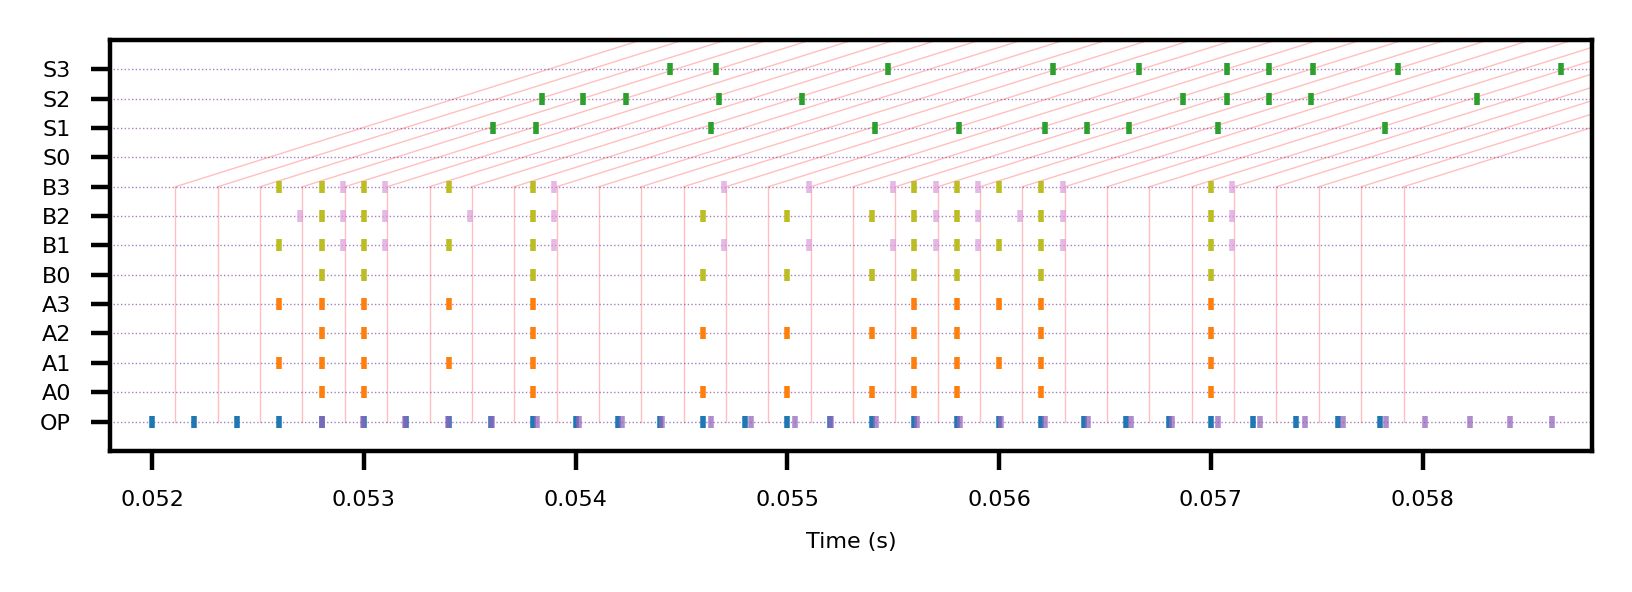

In [6]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

filename = "adder_2_inputs_4bits_factor5_3"
folder = "results_ADDER/"

with open(folder + filename + '.pickle', "rb") as handle:
        sg_times, evts_n = pickle.load(handle)

n_bits = 4
factor = 5

if factor > 5:
    show_lines = False
    adjusted = True
else:
    show_lines = True
    adjusted = False
show_res = True

# ---------------------------------------------------------------

plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = '4'
plt.rcParams["figure.figsize"] = (4, 0.5 * ((5 + 3 * (n_bits - 1)) / 5))  # 5 <- 1 per bit (A, B, S) + 1 extra above + 1 extra below

# Lines
if show_lines:
    plt.hlines(range(-1, 3 * n_bits + 1), 0, sg_times[0][-3] + 0.005 / factor, linestyles='dotted', linewidth=0.25, color='indigo', alpha=0.5)

    for i in sg_times[0]:
        plt.plot([i + 0.00055 / factor, i + 0.00055 / factor + 0.00055 * n_bits], [2 * n_bits - 1, 3 * n_bits], linestyle='-', linewidth=0.25, color='red', alpha=0.25)
        plt.plot([i + 0.00055 / factor, i + 0.00055 / factor], [-1, 2 * n_bits - 1], linestyle='-', linewidth=0.25, color='red', alpha=0.25)
# ------

plt.plot(sg_times[0], [-1] * len(sg_times[0]), '|', markersize=2, color='tab:blue')
for i in range(n_bits):
    plt.plot(sg_times[(i % 2) + 1], [i] * len(sg_times[(i % 2) + 1]), '|', markersize=2, color='tab:orange')
    plt.plot(sg_times[(i % 2) + 1], [i+n_bits] * len(sg_times[(i % 2) + 1]), '|', markersize=2, color='tab:olive')

plt.xlabel('Time (s)')
plt.yticks(range(-1, n_bits * 3))
plt.gca().set_yticklabels(["OP"] + ["A" + str(i) for i in range(n_bits)] + ["B" + str(i) for i in range(n_bits)] + ["S" + str(i) for i in range(n_bits)])
plt.xlim([sg_times[0][0] - 0.001 / factor, sg_times[0][-3] + 0.005 / factor])
plt.ylim([-2, n_bits * 3])

s0_index = 3
if n_bits > 1:
    s0_index = s0_index + 5 * (n_bits - 1) 
else:
    s0_index = s0_index + 1
     
for i in range(n_bits - 1):
    s0_index = s0_index + (2 + 5 * i) * 2

s0_index = s0_index + 6

print(s0_index)
evts_ha = np.array([evt for evt in evts_n if evt[1] == s0_index])
if len(evts_ha) != 0:
    if not adjusted:
        plt.plot(evts_ha[:,0], [n_bits * 2] * len(evts_ha[:,0]), '|', markersize=2, color='tab:green')
    else:
        plt.plot(evts_ha[:,0] - 0.00057, [n_bits * 2] * len(evts_ha[:,0]), '|', markersize=2, color='tab:green')

for i in range(n_bits - 1):
    evts_tmp = []
    for evt in evts_n:
        if evt[1] == s0_index + 18 * (i + 1):
            evts_tmp.append(evt)

    evts_tmp = np.array(evts_tmp)
    if len(evts_tmp) != 0:
        if not adjusted:
            plt.plot(evts_tmp[:,0], [n_bits * 2 + 1 + i] * len(evts_tmp[:,0]), '|', markersize=2, color='tab:green')
        else:
            plt.plot(evts_tmp[:,0] - 0.00082 - 0.00042 * i, [n_bits * 2 + 1 + i] * len(evts_tmp[:,0]), '|', markersize=2, color='tab:green')

# --- COMPARING RESULTS ---
if show_res:
    for t in sg_times[0][0:len(sg_times[0])-2]:
        sum = 0
        if t in sg_times[1]:
            sum += (2 ** 0 + 2 ** 2 + 2 ** 4) * 2
        if t in sg_times[2]:
            sum += (2 ** 1 + 2 ** 3) * 2
        sum_bin = format(sum, "0" + str(n_bits) + "b")[::-1]

        for i in range(n_bits):
            if sum_bin[i] == '1':
                plt.plot(t + 0.001 / (2 * factor), n_bits + i, '|', markersize=2, color='plum', alpha=0.75)

    op_delayed_spikes = np.array([evt for evt in evts_n if evt[1] == n_bits * 2 + 2])
    op_diff = []
    for i in range(len(op_delayed_spikes)):
        op_diff.append(op_delayed_spikes[i][0] - sg_times[0][i])
    plt.plot(op_delayed_spikes, [-1] * len(op_delayed_spikes), '|', markersize=2, color='tab:purple', alpha=0.75)

    print(op_diff)
    print(np.mean(op_diff))

plt.tight_layout()
plt.savefig(folder + filename + '.png', transparent=False, facecolor='white', edgecolor='black')